Project requirements (25%): <br>
Groups of 1-3 students will be formed to work on a term-long group project related to software security technologies. <br>
Which Software Security Technologies? Students are asked to use open source data, e.g. <br>
https://data.phishtank.com/ <br> 
https://stackoverflow.com/<br> 
https://www.kaggle.com/datasetsLinks<br> 
and then perform advanced analysis such as AI/ML in Python.

Jupyter Notebook must be used.<br>
The project will be evaluated based on the problem’s importance, solution novelty, technical quality, degree of complexity/efforts creativity, presentation quality, and documentation quality.
The project has two main deliverables: a presentation and a report.
Presentations (10% of the course grade)
All projects will be demonstrated and presented in class.
About 8-10 minutes will be allocated for the demonstration/presentation of each final project. You can present early in the semester or wait for the final weeks (see the course schedule below). Early presenters will be given a break in the score.
Each group member is expected to participate in every phase of the project.
The final grade of each member will be proportional to his/her participation in the group, as assessed by the instructor and the student’s peers.
Each member should be able to answer questions regarding the project, present some part of the project demo, and actively participate in the system implementation and the writing of the technical report.

### Introduction & Objective

Published in 2009, the NSL-KDD dataset was created to help benchmark and test different intrusion detection systems. This dataset is an improved rendition based on the earlier version of the dataset (KDD 99), where improvements would include containing no redundant records in the training dataset, no duplicate records in the testing dataset, a reasonable amount of records within each dataset, and a more balanced selection of records between the different difficulty levels [1]. This ensures that there would be reduced bias over frequent records, improved performance, and higher evaluation accuracy.

To gain a better understanding of the NSL-KDD dataset, the training data and test data will be further analyzed. This will include the usage of Random Forest for classification, in addition to calculating the accuracy, precision, recall and F-1 score values. Since the dataset is fairly large, graphs will also be incorporated to help visualize the data and results from the calculations made. This will include formatted and tabularized data, pie charts that help display data classification, different feature set selection analysis and a ROC curve graph displaying the performance for the data's classification model. Although this will be heavily focused on analysis, this will serve as a good introductory to the importance of datasets for intrusion detection systems.

### Importing Libraries

In [18]:
#https://www.kaggle.com/datasets/hassan06/nslkdd/data
#https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=8004032
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

###  Data Exploration and Preprocessing

In [19]:
df = pd.read_csv("nsl-kdd/KDDTrain+.txt")
#test_data = pd.read_csv("nsl-kdd/KDDTest+.txt")

In [20]:
# Column label for the training and testing datasets
label = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

df.columns = label
#test_data_df.columns = label

In [21]:
# Display the first few rows of the dataset
df.head()

duration protocol_type  service flag  src_bytes  dst_bytes  land  \
0         0           udp    other   SF        146          0     0   
1         0           tcp  private   S0          0          0     0   
2         0           tcp     http   SF        232       8153     0   
3         0           tcp     http   SF        199        420     0   
4         0           tcp  private  REJ          0          0     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                    0.00   
1               0       0    0  ...                    0.10   
2               0       0    0  ...                    1.00   
3               0       0    0  ...                    1.00   
4               0       0    0  ...                    0.07   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.60                         0.88   
1                    0.05                         0.00   
2                    0.00                         0.03   
3                    0.00                         0.00   
4                    0.07                         0.00   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                         0.00                  0.00   
1                         0.00                  1.00   
2                         0.04                  0.03   
3                         0.00                  0.00   
4                         0.00                  0.00   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                      0.00                   0.0                      0.00   
1                      1.00                   0.0                      0.00   
2                      0.01                   0.0                      0.01   
3                      0.00                   0.0                      0.00   
4                      0.00                   1.0                      1.00   

    attack  level  
0   normal     15  
1  neptune     19  
2   normal     21  
3   normal     21  
4  neptune     21  

[5 rows x 43 columns]

In [22]:
# Statistical summary of the dataset
df.describe()

duration     src_bytes     dst_bytes           land  \
count  125972.000000  1.259720e+05  1.259720e+05  125972.000000   
mean      287.146929  4.556710e+04  1.977927e+04       0.000198   
std      2604.525522  5.870354e+06  4.021285e+06       0.014086   
min         0.000000  0.000000e+00  0.000000e+00       0.000000   
25%         0.000000  0.000000e+00  0.000000e+00       0.000000   
50%         0.000000  4.400000e+01  0.000000e+00       0.000000   
75%         0.000000  2.760000e+02  5.160000e+02       0.000000   
max     42908.000000  1.379964e+09  1.309937e+09       1.000000   

       wrong_fragment         urgent            hot  num_failed_logins  \
count   125972.000000  125972.000000  125972.000000      125972.000000   
mean         0.022688       0.000111       0.204411           0.001222   
std          0.253531       0.014366       2.149977           0.045239   
min          0.000000       0.000000       0.000000           0.000000   
25%          0.000000       0.000000       0.000000           0.000000   
50%          0.000000       0.000000       0.000000           0.000000   
75%          0.000000       0.000000       0.000000           0.000000   
max          3.000000       3.000000      77.000000           5.000000   

           logged_in  num_compromised  ...  dst_host_srv_count  \
count  125972.000000    125972.000000  ...       125972.000000   
mean        0.395739         0.279253  ...          115.653725   
std         0.489011        23.942137  ...          110.702886   
min         0.000000         0.000000  ...            0.000000   
25%         0.000000         0.000000  ...           10.000000   
50%         0.000000         0.000000  ...           63.000000   
75%         1.000000         0.000000  ...          255.000000   
max         1.000000      7479.000000  ...          255.000000   

       dst_host_same_srv_rate  dst_host_diff_srv_rate  \
count           125972.000000           125972.000000   
mean                 0.521244                0.082952   
std                  0.448950                0.188922   
min                  0.000000                0.000000   
25%                  0.050000                0.000000   
50%                  0.510000                0.020000   
75%                  1.000000                0.070000   
max                  1.000000                1.000000   

       dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
count                125972.000000                125972.000000   
mean                      0.148379                     0.032543   
std                       0.308998                     0.112564   
min                       0.000000                     0.000000   
25%                       0.000000                     0.000000   
50%                       0.000000                     0.000000   
75%                       0.060000                     0.020000   
max                       1.000000                     1.000000   

       dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
count         125972.000000             125972.000000         125972.000000   
mean               0.284455                  0.278487              0.118832   
std                0.444785                  0.445670              0.306559   
min                0.000000                  0.000000              0.000000   
25%                0.000000                  0.000000              0.000000   
50%                0.000000                  0.000000              0.000000   
75%                1.000000                  1.000000              0.000000   
max                1.000000                  1.000000              1.000000   

       dst_host_srv_rerror_rate          level  
count             125972.000000  125972.000000  
mean                   0.120241      19.504056  
std                    0.319460       2.291512  
min                    0.000000       0.000000  
25%                    0.000000      18.000000  
50%                   

### Labeling and analyzing the different attack types

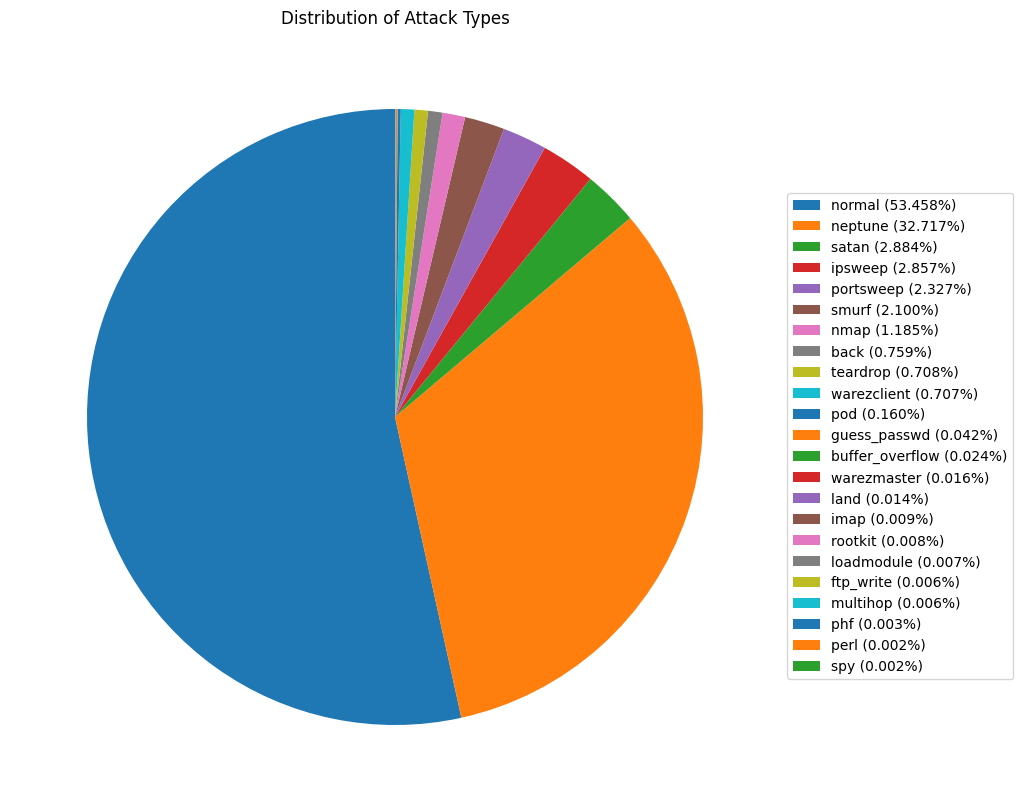

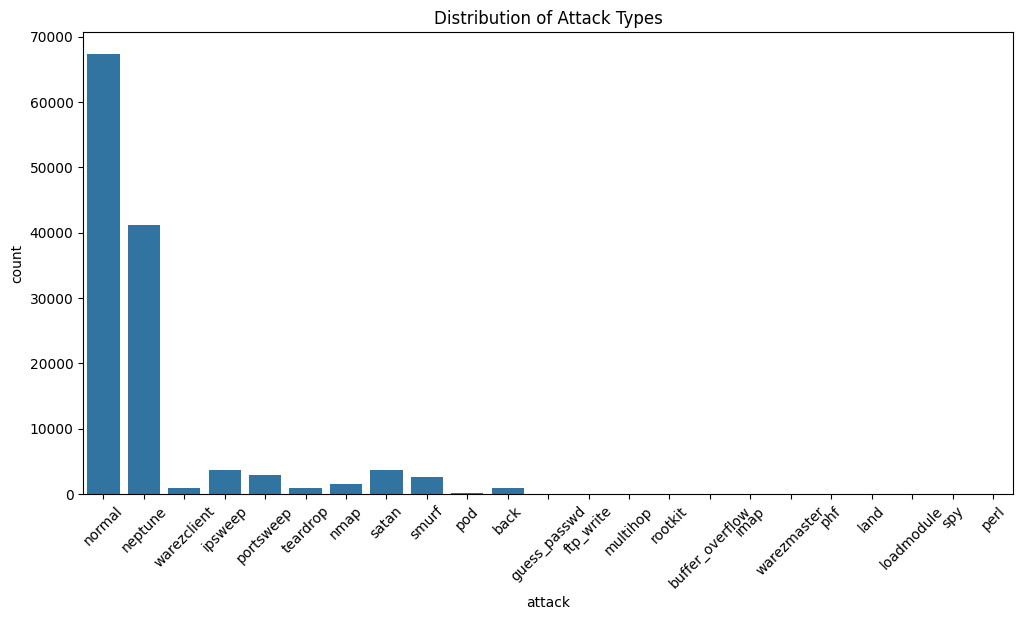

In [23]:
# Append a new column 'is_attack' based on the 'attack' column
df['is_attack'] = df['attack'].apply(lambda x: 1 if x != 'normal' else 0)
#test_data['is_attack'] = test_data['attack'].apply(lambda x: 1 if x != 'normal' else 0)

# Count the occurrences of each attack type
attack_training_count = df['attack'].value_counts()

# Attack table for training data
plt.figure(figsize=(10, 10))
pieTable = plt.pie(attack_training_count, labels=None, startangle=90)
plt.title('Distribution of Attack Types')
# Legend to contain the attack type and percentage
labels = [f'{label} ({percent:.3f}%)' for label, percent in zip(attack_training_count.index, attack_training_count.values / sum(attack_training_count) * 100)]
plt.legend(pieTable[0], labels, bbox_to_anchor=(1.0,0.8))
plt.show()

# Distribution of attacks
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='attack')
plt.xticks(rotation=45)
plt.title('Distribution of Attack Types')
plt.show()

## Feature Encoding

#### Check which features need to be dropped

In [24]:
counts = {}
for column in df:
    if len(df[column].unique()) < 2:
           print(column)

print("Any empty values:", df.isnull().values.any())

num_outbound_cmds
Any empty values: False


#### Cleaning up

In [25]:
#Drop it because it's an empty column
df = df.drop("num_outbound_cmds", axis=1)

#Separating out before encoding for simpicity
y = df["is_attack"]
y_precise = df["attack"]
df = df.drop(["is_attack", "attack"], axis=1)

cat_columns = df.select_dtypes(include=["object"]).columns.tolist()

#### Train/Test Split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df, y, random_state = 68, test_size=30, shuffle=True)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125942 entries, 108715 to 11071
Data columns (total 41 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125942 non-null  int64  
 1   protocol_type                125942 non-null  object 
 2   service                      125942 non-null  object 
 3   flag                         125942 non-null  object 
 4   src_bytes                    125942 non-null  int64  
 5   dst_bytes                    125942 non-null  int64  
 6   land                         125942 non-null  int64  
 7   wrong_fragment               125942 non-null  int64  
 8   urgent                       125942 non-null  int64  
 9   hot                          125942 non-null  int64  
 10  num_failed_logins            125942 non-null  int64  
 11  logged_in                    125942 non-null  int64  
 12  num_compromised              125942 non-null  int64  
 13  

#### One Hot Encoding

In [27]:
ohe = OneHotEncoder(sparse_output=False)

encoded_cat_columns = ohe.fit_transform(X_train[cat_columns])
df_encoded_cat_columns = pd.DataFrame(encoded_cat_columns, columns=ohe.get_feature_names_out(cat_columns))
X_ohe_train = pd.concat([X_train, df_encoded_cat_columns], axis=1)
X_ohe_train = X_ohe_train.drop(cat_columns, axis=1)

X_ohe_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125972 entries, 108715 to 116674
Columns: 122 entries, duration to flag_SH
dtypes: float64(122)
memory usage: 118.2 MB


#### Ordinal Encoding

In [28]:
ordinal = OrdinalEncoder()

encoded_cat_columns = ordinal.fit_transform(df[cat_columns])
df_encoded_cat_columns = pd.DataFrame(encoded_cat_columns, columns=ordinal.get_feature_names_out(cat_columns))
X_ordinal_train = pd.concat([df, df_encoded_cat_columns], axis=1)
X_ordinal_train = X_ordinal_train.drop(cat_columns, axis=1)

X_ordinal_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 38 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   src_bytes                    125972 non-null  int64  
 2   dst_bytes                    125972 non-null  int64  
 3   land                         125972 non-null  int64  
 4   wrong_fragment               125972 non-null  int64  
 5   urgent                       125972 non-null  int64  
 6   hot                          125972 non-null  int64  
 7   num_failed_logins            125972 non-null  int64  
 8   logged_in                    125972 non-null  int64  
 9   num_compromised              125972 non-null  int64  
 10  root_shell                   125972 non-null  int64  
 11  su_attempted                 125972 non-null  int64  
 12  num_root                     125972 non-null  int64  
 13 

In [29]:
X_ohe_train[X_ohe_train.isna().any(axis=1)]

duration  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
125946       0.0       18.0        0.0   0.0             0.0     0.0  0.0   
125967       0.0        0.0        0.0   0.0             0.0     0.0  0.0   
125954       0.0        0.0        0.0   0.0             0.0     0.0  0.0   
125945       0.0        0.0        0.0   0.0             0.0     0.0  0.0   
125969       0.0     2231.0      384.0   0.0             0.0     0.0  0.0   
125965       0.0        0.0        0.0   0.0             0.0     0.0  0.0   
125951       0.0     1289.0      408.0   0.0             0.0     0.0  0.0   
125970       0.0        0.0        0.0   0.0             0.0     0.0  0.0   
125950       0.0      254.0      555.0   0.0             0.0     0.0  0.0   
125966       0.0      359.0      375.0   0.0             0.0     0.0  0.0   
125944       0.0      247.0      799.0   0.0             0.0     0.0  0.0   
125947       0.0        0.0        0.0   0.0             0.0     0.0  0.0   
125962       0.0      334.0     1600.0   0.0             0.0     0.0  0.0   
125956       1.0     1247.0      327.0   0.0             0.0     0.0  0.0   
125958       0.0      373.0     4777.0   0.0             0.0     0.0  0.0   
125953       0.0      269.0    10939.0   0.0             0.0     0.0  0.0   
125959       0.0      329.0      885.0   0.0             0.0     0.0  0.0   
125955       0.0       30.0        0.0   0.0             0.0     0.0  0.0   
125957       0.0        0.0        0.0   0.0             0.0     0.0  0.0   
125968       8.0      105.0      145.0   0.0             0.0     0.0  0.0   
125952       0.0        0.0        0.0   0.0             0.0     0.0  0.0   
125949       0.0       28.0        0.0   0.0             3.0     0.0  0.0   
125961       0.0       33.0        0.0   0.0             0.0     0.0  0.0   
125943       1.0     2049.0      362.0   0.0             0.0     0.0  0.0   
125942       0.0      491.0        0.0   0.0             0.0     0.0  0.0   
125948       0.0        0.0        0.0   0.0             0.0     0.0  0.0   
125960       0.0      236.0     2698.0   0.0             0.0     0.0  0.0   
125964       0.0     2233.0      365.0   0.0             0.0     0.0  0.0   
125971       0.0      151.0        0.0   0.0             0.0     0.0  0.0   
125963       0.0        0.0        0.0   0.0             0.0     0.0  0.0   
5390         NaN        NaN        NaN   NaN             NaN     NaN  NaN   
7178         NaN        NaN        NaN   NaN             NaN     NaN  NaN   
11622        NaN        NaN        NaN   NaN             NaN     NaN  NaN   
24548        NaN        NaN        NaN   NaN             NaN     NaN  NaN   
31130        NaN        NaN        NaN   NaN             NaN     NaN  NaN   
32385        NaN        NaN        NaN   NaN             NaN     NaN  NaN   
36540        NaN        NaN        NaN   NaN             NaN     NaN  NaN   
50177        NaN        NaN        NaN   NaN             NaN     NaN  NaN   
56485        NaN        NaN        NaN   NaN             NaN     NaN  NaN   
57661        NaN        NaN        NaN   NaN             NaN     NaN  NaN   
58004        NaN        NaN        NaN   NaN             NaN     NaN  NaN   
59975        NaN        NaN        NaN   NaN             NaN     NaN  NaN   
66215        NaN        NaN        NaN   NaN             NaN     NaN  NaN   
66999        NaN        NaN        NaN   NaN             NaN     NaN  NaN   
68872        NaN        NaN        NaN   NaN             NaN     NaN  NaN   
74428        NaN        NaN        NaN   NaN             NaN     NaN  NaN   
75635        NaN        NaN        NaN   NaN             NaN     NaN  NaN   
80320        NaN        NaN        NaN   NaN             NaN     NaN  NaN   
87619        NaN        NaN        NaN   NaN             NaN     NaN  NaN   
89751        NaN        NaN        NaN   NaN             NaN     NaN  NaN   
91698        NaN        NaN        NaN   NaN             NaN     NaN  NaN   
9327

In [30]:
#I'm not sure why both encoding things add 30 columns with NAN, but the ratio is low enough that I'm just deleting them and hoping the rest is still valid
#X_ohe_train = X_ohe_train.dropna()
#X_ordinal_train = X_ordinal_train.dropna()

### Correlation Matrix Based on Dataset Features

In [31]:
# Correlation matrix for one hot encoded
plt.figure(figsize=(300, 150))
sns.heatmap(X_ohe_train.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

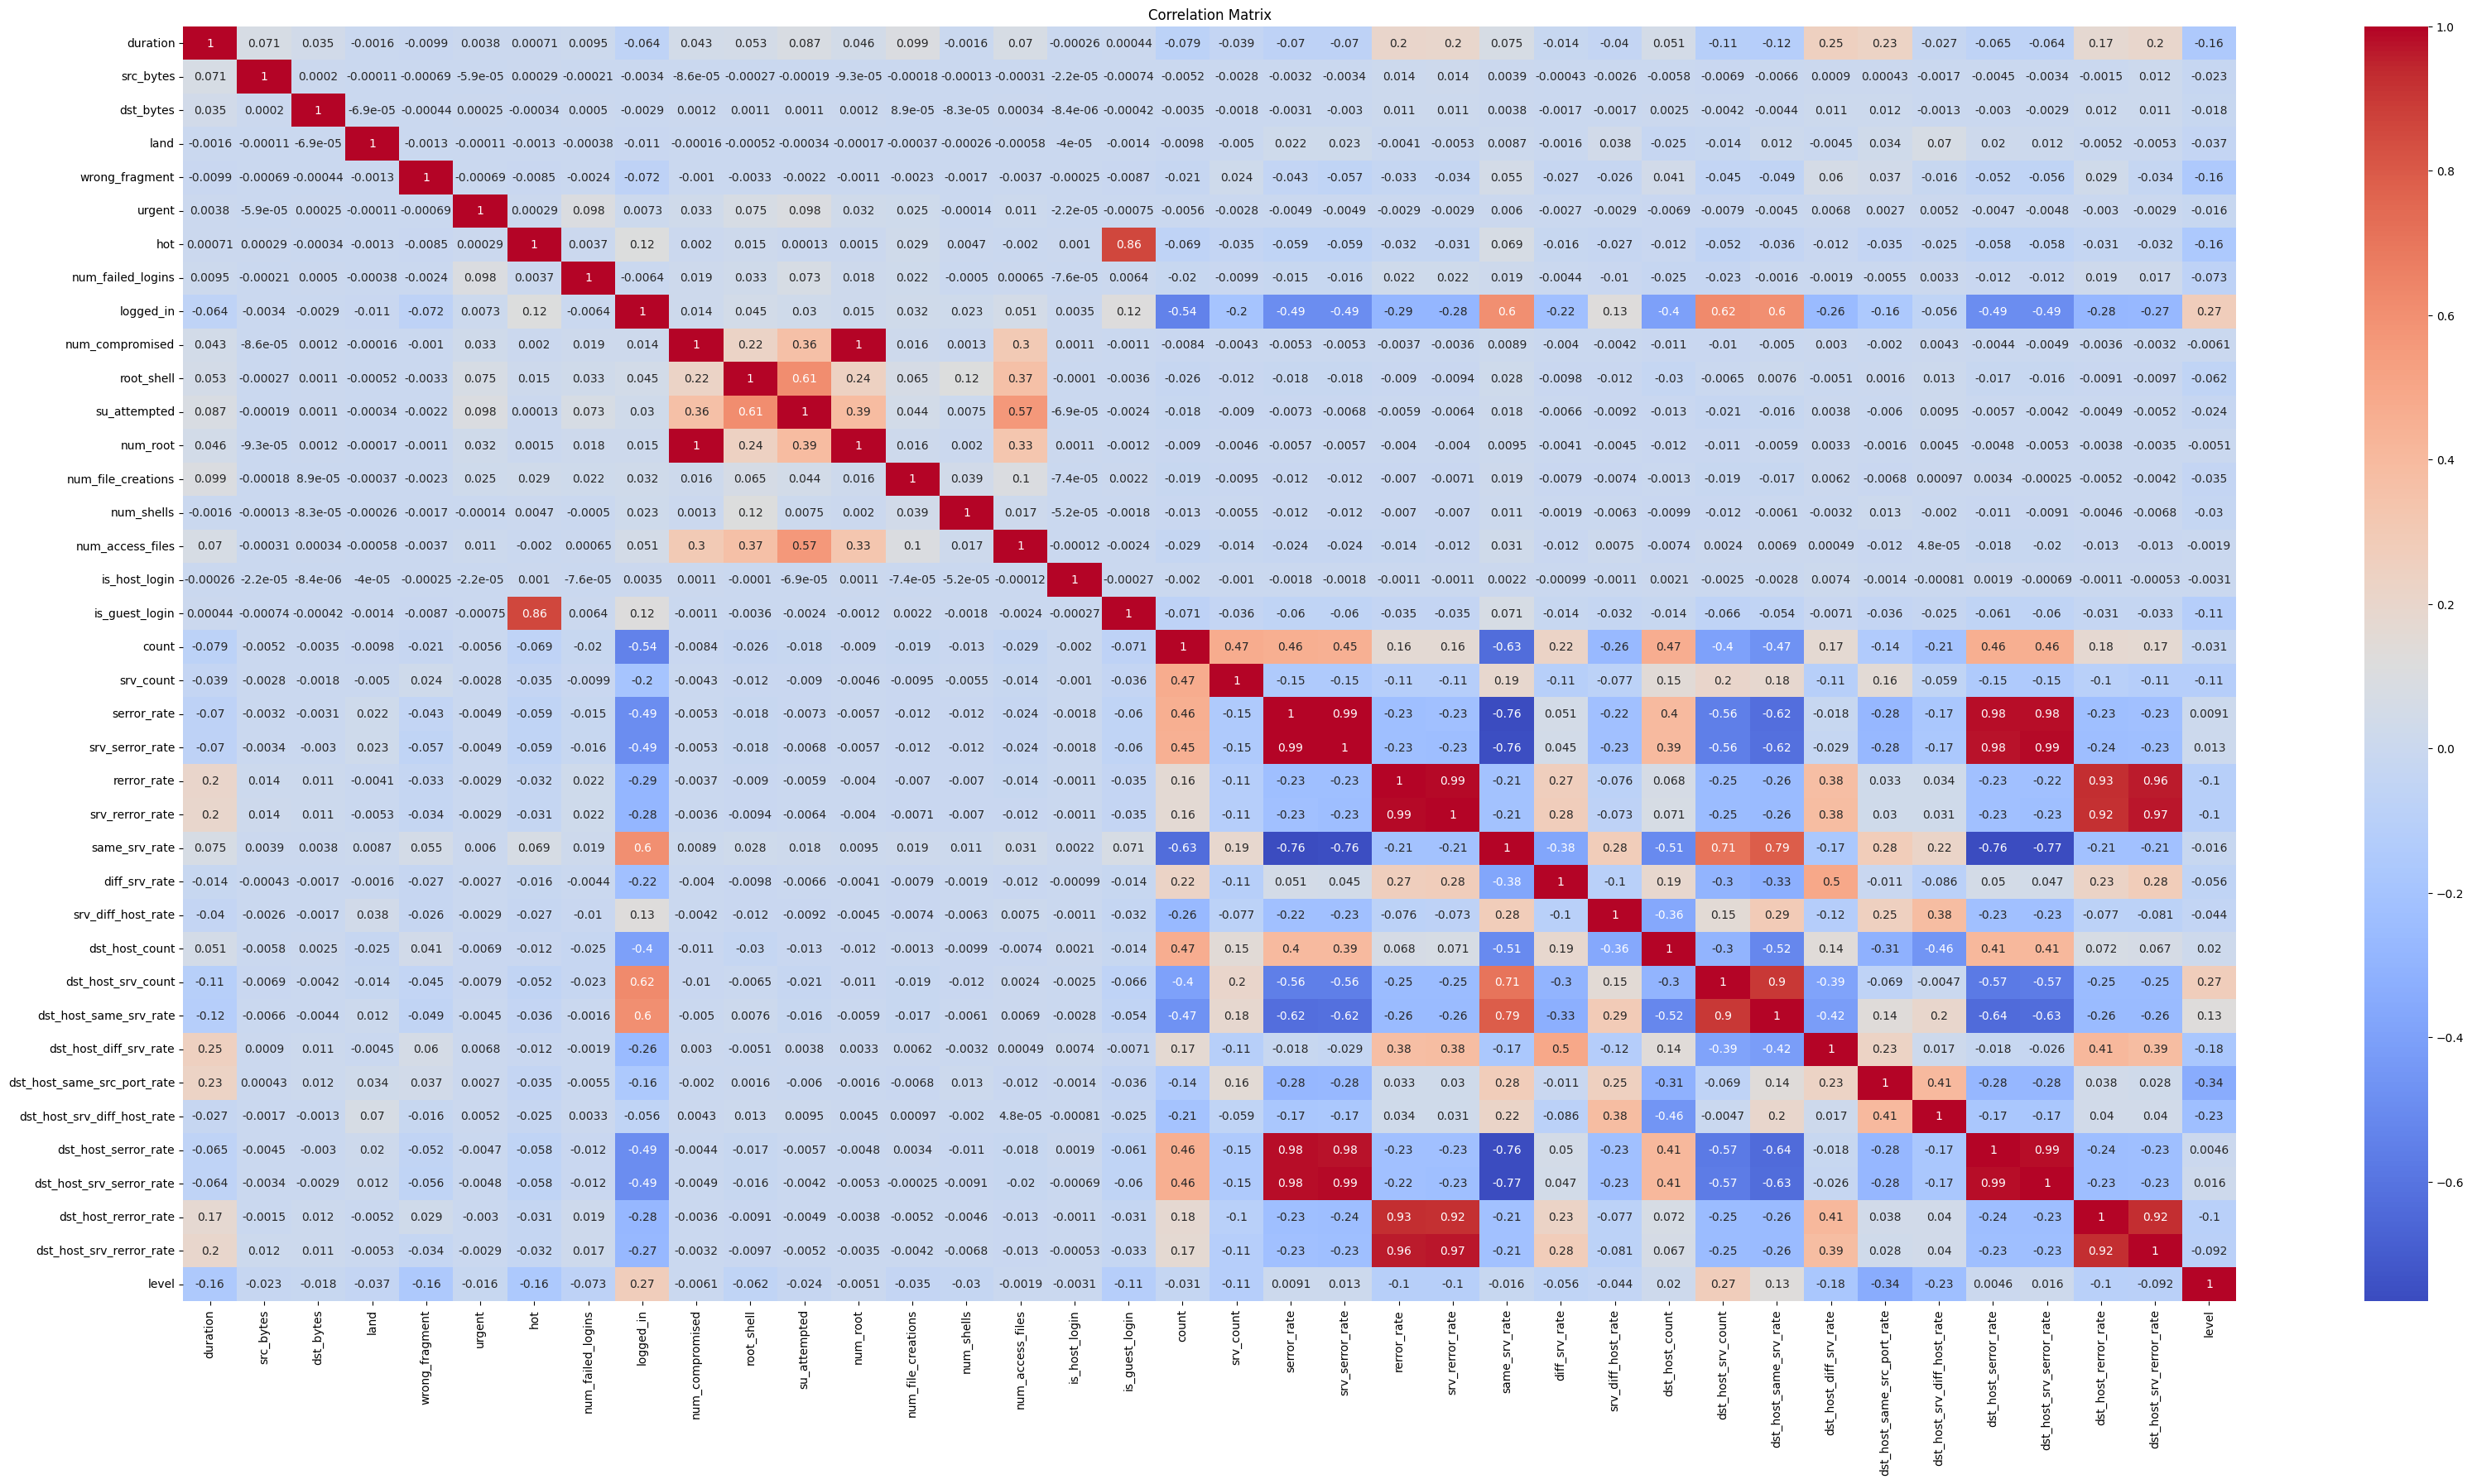

In [32]:
# Correlation matrix for ordinal encoded
plt.figure(figsize=(40, 20))
sns.heatmap(X_ordinal_train.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Feature Selection

#### Selecting the Top k Features OHE

In [33]:
# Select the top 10 features (k=10)
selector = SelectKBest(score_func=f_classif, k=10)

x_selected = selector.fit_transform(X_ohe_train, y)

# Get selected feature names
selected_features = X_ohe_train.columns[selector.get_support()]

# Display selected features
print("Selected Features:")
print(selected_features)

ValueError: Input X contains NaN.
SelectKBest does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

### Modeling

#### Random Forest

In [ ]:
# Calculate for: accuracy, precision, recall, f1 score

### Conclusion

References <br>
[1] https://www.unb.ca/cic/datasets/nsl.html